Pendiente (coeficiente): -0.4467650890143291
Intercepto: 20.720744680851062


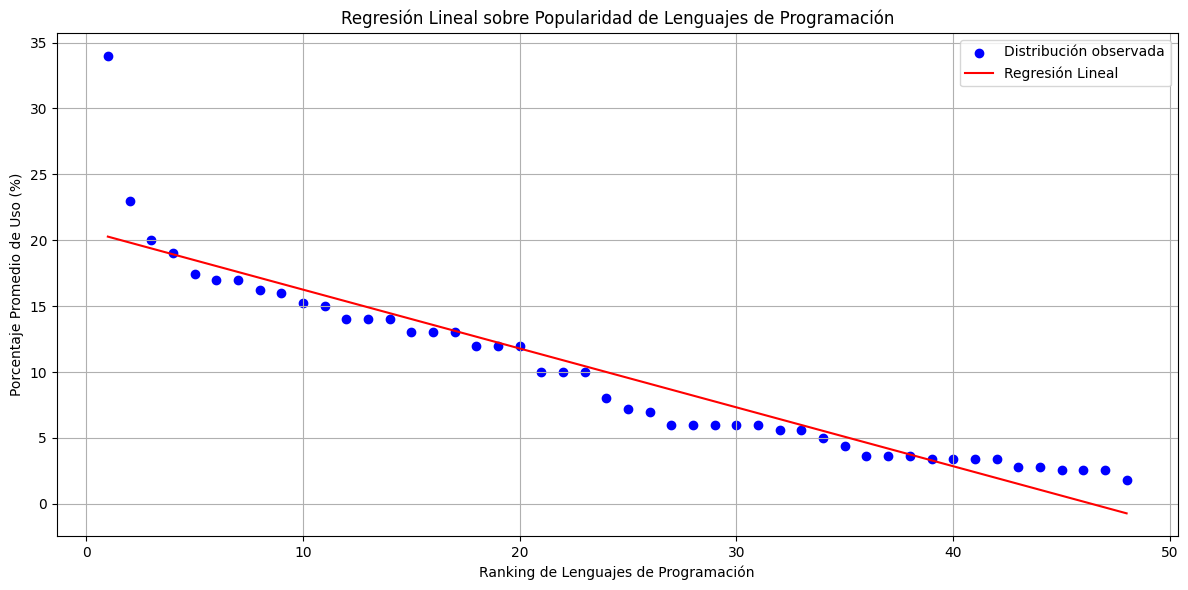

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Cargar el archivo CSV
archivo_csv = "DistribuciónLenguajesProgramación.csv"

df = pd.read_csv("DistribuciónLenguajesProgramación.csv")


# Convertir columnas de porcentaje a flotantes (removiendo '%')
columnas_porcentajes = [
    "Desarrollo Web (%)", "Data Science (%)", "Machine Learning (%)",
    "Automatizaci¢n (%)", "Aplicaciones M¢viles (%)"
]

for col in columnas_porcentajes:
    df[col] = df[col].str.rstrip('%').astype(float)

# Calcular un ranking ficticio basado en el promedio de porcentajes de uso por lenguaje
df["Promedio"] = df[columnas_porcentajes].mean(axis=1)
df = df.sort_values(by="Promedio", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Separar las variables independiente (Ranking) y dependiente (Promedio)
X = df[["Ranking"]].values  # Variable independiente
y = df["Promedio"].values    # Variable dependiente

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Mostrar los coeficientes del modelo
print("Pendiente (coeficiente):", model.coef_[0])
print("Intercepto:", model.intercept_)

# Graficar los datos observados y la regresión lineal
plt.figure(figsize=(12, 6))
plt.scatter(df["Ranking"], df["Promedio"], color="blue", label="Distribución observada")
plt.plot(df["Ranking"], y_pred, color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Ranking de Lenguajes de Programación")
plt.ylabel("Porcentaje Promedio de Uso (%)")
plt.title("Regresión Lineal sobre Popularidad de Lenguajes de Programación")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()